# PROJET FOODY_ Data Analyse

In [1]:
# Import des dépendances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pymysql as sql
import seaborn as sns
sns.set()

In [2]:
# Se Connecter à la BDD Foody_data
conn = sql.connect(host='Localhost',user='root',passwd='XXXXXXXXXX', database='Foody_data')
if conn:
    print("Connection Successful!")
else:
    print("Connection Failed!")
cur = conn.cursor()

Connection Successful!


In [3]:
def sql_to_df(sql_query):

    # Use pandas to pass sql query using connection form mySQL
    df = pd.read_sql(sql_query, conn)

    # Show the resulting DataFrame
    return df

In [5]:
%matplotlib inline

## Quel est le top 5 des pays ayant passés le plus de commande ? 

In [6]:
query1 = '''SELECT distinct PaysLiv, count(NoCom) as Nb_commande 
            FROM Commande group by PaysLiv 
            ORDER BY Nb_commande DESC LIMIT 5 '''

sql_to_df(query1)

,PaysLiv,Nb_commande
0,Germany,122
1,USA,122
2,Brazil,83
3,France,77
4,UK,56


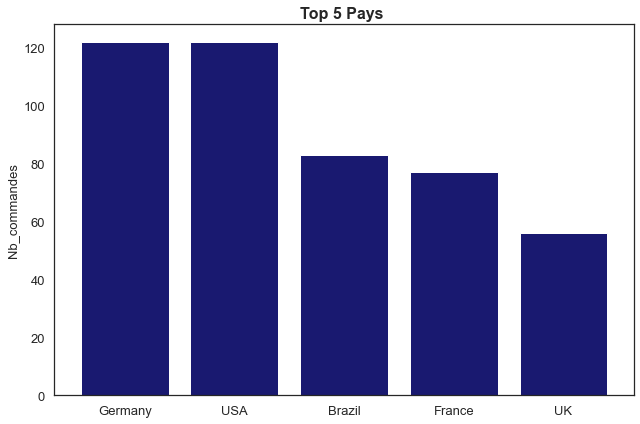

In [8]:
df1= sql_to_df(query1)
sns.set_style("white")
plt.figure(figsize = (9, 6))
plt.bar(x =  df1["PaysLiv"] , 
        height =df1["Nb_commande"], 
        color = "midnightblue")
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)

plt.title("Top 5 Pays ", fontsize = 16, fontweight = "bold")
plt.ylabel("Nb_commandes", fontsize = 13 )
plt.tight_layout()
plt.savefig("Top5_pays_cmd.png")
           
plt.show()

=> Réponse : dans le graphe ci dessus: avec l'Allemagne, les USA, le Brésil, la France et l'Angleterre

## Comment ont évolués  les commandes des pays de ce top 5 entre 2006, 2007 et 2008 ? 

In [71]:
query2 = '''SELECT PaysLiv, count(DateCom) as nb_cmd_2006 
            FROM Commande WHERE DateCom like "%2006%" 
            group by PaysLiv order By nb_cmd_2006 desc LIMIT 5;'''
sql_to_df(query2)

,PaysLiv,nb_cmd_2006
0,Germany,24
1,USA,23
2,France,15
3,Brazil,13
4,UK,10


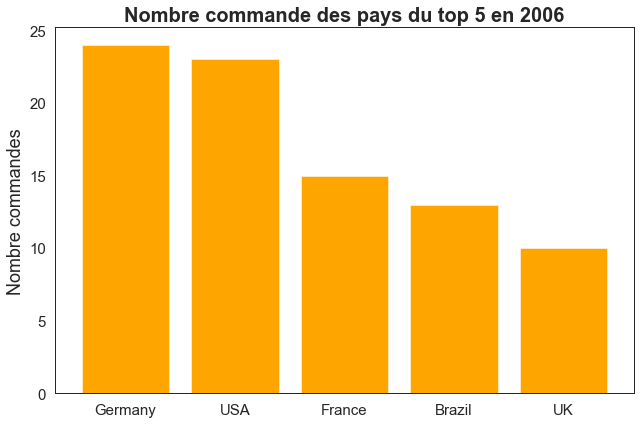

In [78]:
df2 = sql_to_df(query2)
sns.set_style("white")
plt.figure(figsize = (9, 6))
plt.bar(x = df2["PaysLiv"] , 
        height =df2["nb_cmd_2006"], 
        color = "orange")
plt.xticks( fontsize = 15)
plt.yticks( fontsize = 15)
plt.title("Nombre commande des pays du top 5 en 2006", fontsize = 20, fontweight = "bold")
plt.ylabel("Nombre commandes", fontsize = 18 )
plt.tight_layout()
plt.savefig("Cmd_paystop5_2006.png")
plt.show()

In [11]:
query3='''SELECT PaysLiv, YEAR(DateCom) as Annees , 
count(DateCom) as nb_cmd FROM Commande 
WHERE (DateCom like "%2006%" OR  DateCom Like "%2007%" 
OR DateCom like "%2008%")
AND PaysLiv IN ("Germany", "USA" , "Brazil", "France", "UK")
group by PaysLiv, YEAR (DateCom) 
ORDER BY PaysLiv;'''
sql_to_df(query3)

,PaysLiv,Annees,nb_cmd
0,Brazil,2006,13
1,Brazil,2007,42
2,Brazil,2008,28
3,France,2006,15
4,France,2007,39
5,France,2008,23
6,Germany,2006,24
7,Germany,2007,64
8,Germany,2008,34
9,UK,2006,10


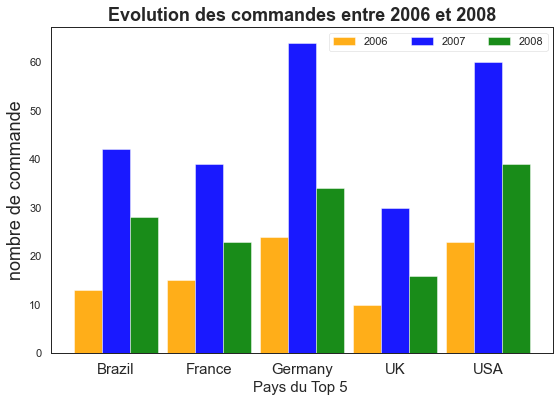

In [69]:
plt.style.use('ggplot')
sns.set_style("white")
n = 5

x_2006 = (df3.nb_cmd[0::3])
x_2007 = (df3.nb_cmd[1::3])
x_2008 = (df3.nb_cmd[2::3])

fig, ax = plt.subplots(figsize = (9, 6))
index = np.arange(n)
bar_width = 0.3
opacity = 0.9
ax.bar(index, x_2006, bar_width, alpha=opacity, color='orange',label='2006')
ax.bar(index+bar_width, x_2007, bar_width, alpha=opacity, color='blue',label='2007')
ax.bar(index+2*bar_width, x_2008, bar_width, alpha=opacity,color='green', label='2008')
ax.set_xlabel('Pays du Top 5 ', size=15)
ax.set_ylabel('nombre de commande', size=18)
ax.set_title('Evolution des commandes entre 2006 et 2008', size=18,fontweight='bold')
ax.set_xticks(index + bar_width)
ax.set_xticklabels((df3.PaysLiv[0::3]), size = 15)#("Brazil","France","Germany", "UK","USA"))
ax.legend(ncol=3)
plt.savefig("Evolution_top5.png")
plt.show()

### Exemple de "Grouped bar chart" à adapter pour notre dataframe

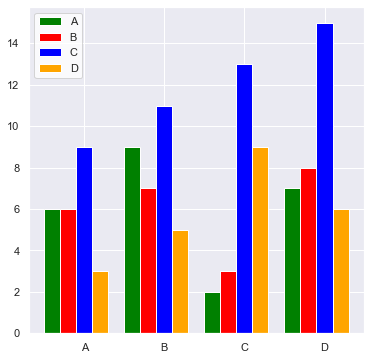

In [84]:
categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): décalage du xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show()

### Test Stacked bar chart :

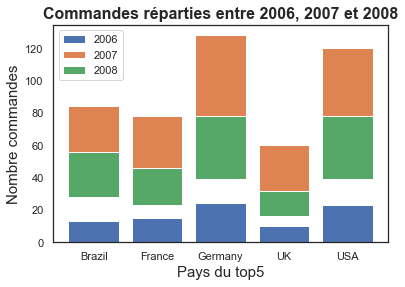

In [156]:
labels = ['Brazil','France','Germany', 'UK','USA']
x_2006 = [13, 15, 24, 10, 23]
x_2007 = [42, 39, 64, 30, 60]
x_2008= [28, 23, 39, 16, 39]

fig, ax = plt.subplots()
   
ax.bar(labels, x_2006,   label='2006')
ax.bar(labels, x_2007,   bottom=x_2007, label='2007')
ax.bar(labels, x_2008,   bottom=x_2008, label='2008')

ax.set_ylabel('Nombre commandes', fontsize=15)
ax.set_xlabel('Pays du top5', fontsize=15)
ax.set_title('Commandes réparties entre 2006, 2007 et 2008',
             fontsize=16, fontweight='bold')
ax.legend()
plt.savefig("Stacked_bar_char.png")
plt.show()

In [159]:
query4= '''SELECT CodeCateg, NomCateg,  count(NomProd) as nb_prod 
From produit natural join Categorie 
group by CodeCateg;'''
sql_to_df(query4)

,CodeCateg,NomCateg,nb_prod
0,1,drinks,12
1,2,Condiments,12
2,3,Desserts,13
3,4,Dairy Products,10
4,5,Grains/Cereals,7
5,6,Meat/Poultry,6
6,7,Produce,5
7,8,Seafood,12


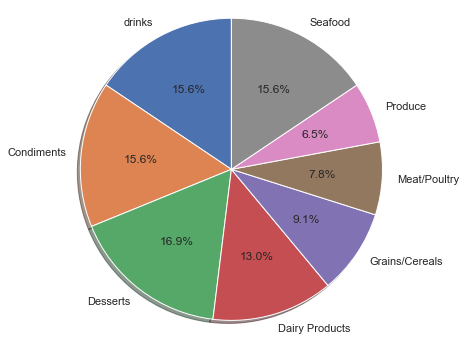

In [193]:
df4 = sql_to_df(query4)
# Pie chart, where the slices will be ordered 
# and plotted counter-clockwise:
labels = df4['NomCateg']
sizes = df4['nb_prod']
#explode = (0, 0.1, 0, 0)  
# only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Pie_chart.png")
plt.show()